# Задание 3

In [1]:
%matplotlib inline

import random
from itertools import islice
from typing import Generator, Tuple, List

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set(style='whitegrid')

## Упражнение 1.
Составить программу моделирования случайных точек, равномерно распределенных  внутри эллипса $\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1$.

Построить гистограмму распределения.

In [19]:
def ellipse_generator(a: float, b: float)-> Generator[Tuple[int, int], None, None]:
    while True:
        point = (a * (2 * random.random() - 1), b * (2 * random.random() - 1))
        if (point[0] ** 2 / a ** 2) + (point[1] ** 2 / b ** 2) < 1:
            yield point

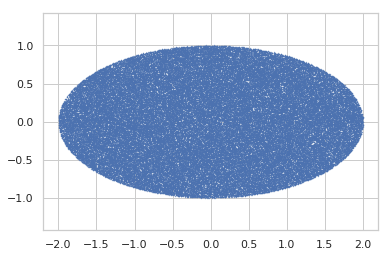

In [28]:
n_points = 10 ** 5

points = list(islice(ellipse_generator(2, 1), n_points))

plt.scatter(x=[p[0] for p in points], y=[p[1] for p in points], s=0.1)

plt.axis('equal')
plt.show()